In [1]:
%load_ext autoreload
%autoreload 2
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import Toolkit_01 as ml

# K_means

In [2]:
init_data = pd.read_csv("AdmissionPredict.csv")
init_data

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337.0,118.0,4,4.5,4.5,9.65,1,0.92
1,2,324.0,107.0,4,4.0,4.5,8.87,1,NaN
2,3,316.0,NaN,3,3.0,3.5,8.00,1,0.72
3,4,NaN,110.0,3,3.5,2.5,8.67,1,0.80
4,5,314.0,103.0,2,2.0,3.0,8.21,0,0.65
...,...,...,...,...,...,...,...,...,...
395,396,324.0,110.0,3,3.5,3.5,9.04,1,0.82
396,397,325.0,107.0,3,3.0,3.5,9.11,1,NaN
397,398,330.0,116.0,4,5.0,4.5,9.45,1,0.91
398,399,312.0,103.0,3,3.5,4.0,8.78,0,0.67


In [3]:
X = init_data.drop(["Serial No.", "Chance of Admit"], axis=1)
for i in X.columns:
    X[i].fillna(X[i].mean(), inplace=True)
X

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research
0,337.000000,118.000000,4,4.5,4.5,9.65,1
1,324.000000,107.000000,4,4.0,4.5,8.87,1
2,316.000000,107.386842,3,3.0,3.5,8.00,1
3,316.759259,110.000000,3,3.5,2.5,8.67,1
4,314.000000,103.000000,2,2.0,3.0,8.21,0
...,...,...,...,...,...,...,...
395,324.000000,110.000000,3,3.5,3.5,9.04,1
396,325.000000,107.000000,3,3.0,3.5,9.11,1
397,330.000000,116.000000,4,5.0,4.5,9.45,1
398,312.000000,103.000000,3,3.5,4.0,8.78,0


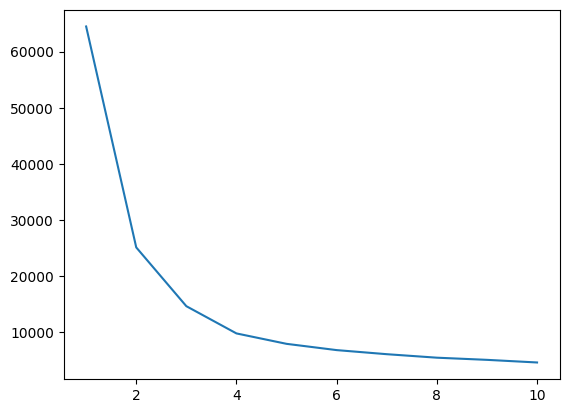

In [4]:
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init="k-means++", max_iter=300, n_init=10, random_state=0)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 11), wcss)
plt.show()

# we choose 3 and 4

In [5]:
model1 = KMeans(n_clusters=3, init="k-means++", max_iter=300, n_init=10, random_state=0)
model2 = KMeans(n_clusters=4, init="k-means++", max_iter=300, n_init=10, random_state=0)

y_model1 = model1.fit_predict(X)
y_model2 = model2.fit_predict(X)

# now let's see them

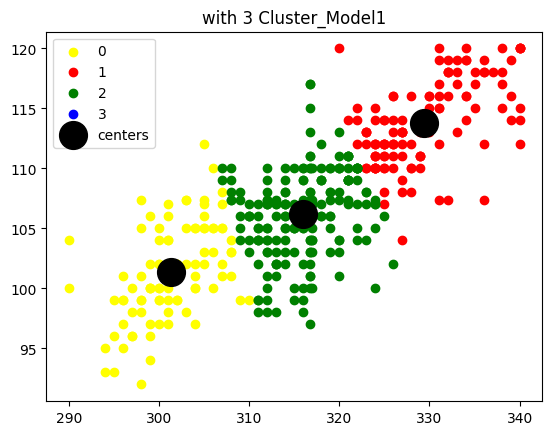

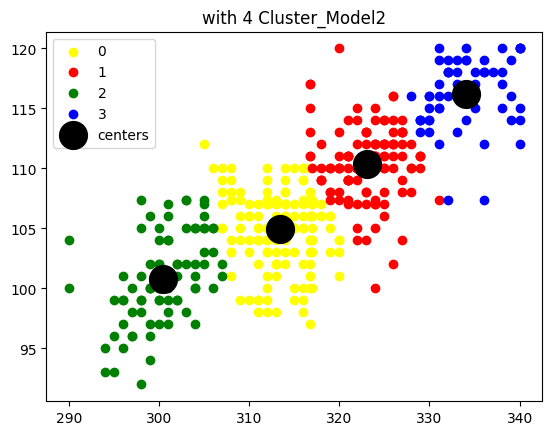

In [6]:
X1, X2 = X.copy(), X.copy()
X1["Label"], X2["Label"] = y_model1, y_model2
# model1 for GRE and TOEFL
plt.scatter(X1[X1["Label"] == 0].iloc[:, 0], X1[X1["Label"] == 0].iloc[:, 1], marker="o", color="yellow", label="0")
plt.scatter(X1[X1["Label"] == 1].iloc[:, 0], X1[X1["Label"] == 1].iloc[:, 1], marker="o", color="red", label="1")
plt.scatter(X1[X1["Label"] == 2].iloc[:, 0], X1[X1["Label"] == 2].iloc[:, 1], marker="o", color="green", label="2")
plt.scatter(X1[X1["Label"] == 3].iloc[:, 0], X1[X1["Label"] == 3].iloc[:, 1], marker="o", color="blue", label="3")
plt.scatter(model1.cluster_centers_[:, 0], model1.cluster_centers_[:, 1], marker="o", color="black", s=400,
            label="centers")
plt.legend()
plt.title("with 3 Cluster_Model1")
plt.show()

plt.clf()
plt.scatter(X2[X2["Label"] == 0].iloc[:, 0], X2[X2["Label"] == 0].iloc[:, 1], marker="o", color="yellow", label="0")
plt.scatter(X2[X2["Label"] == 1].iloc[:, 0], X2[X2["Label"] == 1].iloc[:, 1], marker="o", color="red", label="1")
plt.scatter(X2[X2["Label"] == 2].iloc[:, 0], X2[X2["Label"] == 2].iloc[:, 1], marker="o", color="green", label="2")
plt.scatter(X2[X2["Label"] == 3].iloc[:, 0], X2[X2["Label"] == 3].iloc[:, 1], marker="o", color="blue", label="3")
plt.scatter(model2.cluster_centers_[:, 0], model2.cluster_centers_[:, 1], marker="o", color="black", s=400,
            label="centers")
plt.legend()
plt.title("with 4 Cluster_Model2")
plt.show()


# Kmeans by my self

In [15]:
data = init_data.copy()
data.drop(["Serial No.", "Chance of Admit"], axis=1, inplace=True)
data.dropna(inplace=True)

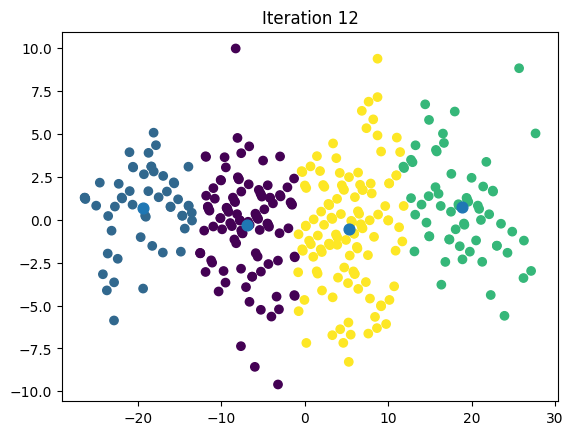

In [17]:
model = ml.K_means(data, 4, 30)
model.kmeans()

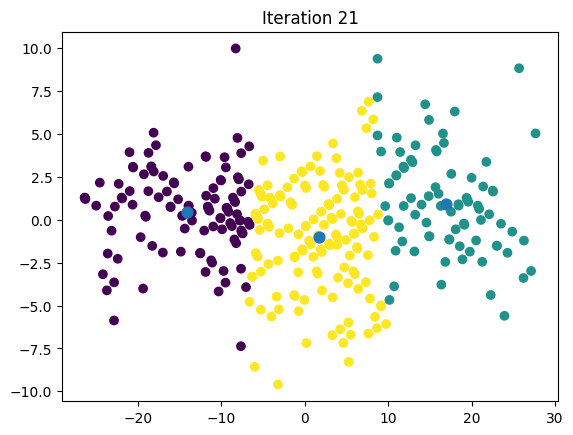

In [20]:
model = ml.K_means(data, 3, 30)
model.kmeans()

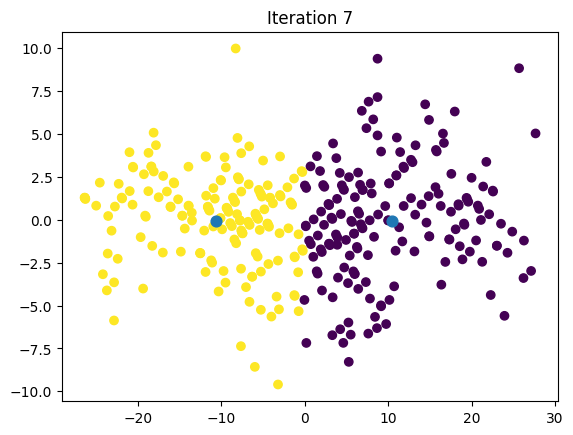

In [19]:
model = ml.K_means(data, 2, 30)
model.kmeans()